In [8]:
%matplotlib inline
import wandb
import matplotlib.pyplot as plt
import pandas as pd
import plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns
import numpy as np
import itertools

# Read data from wandb api or alternatively from text file

API key must be set up in command line using
$ wandb login

In [4]:
pr = np.loadtxt('YOLOv5m/PR_data.txt')
p = np.loadtxt('YOLOv5m/P_data.txt')
r = np.loadtxt('YOLOv5m/R_data.txt')
pr2 = np.loadtxt('TTA/PR_data.txt')
p2 = np.loadtxt('TTA/P_data.txt')
r2 = np.loadtxt('TTA/R_data.txt')
x = np.linspace(0,1,1000)

In [25]:
pr

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        3.22245322e-03, 1.61122661e-03, 0.00000000e+00],
       [7.41935484e-01, 7.41935484e-01, 7.41935484e-01, ...,
        9.15415727e-04, 4.57707863e-04, 0.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        6.89684900e-05, 3.44842450e-05, 0.00000000e+00]])

C:\Users\Julius\AppData\Local\Temp/ipykernel_14232/4040266585.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


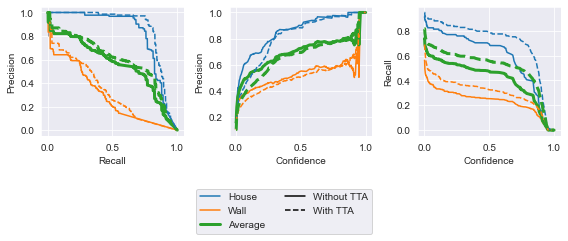

In [22]:
fig, ax = plt.subplots(1, 3,sharex= 'col', figsize=(8,2.5))
colors = sns.color_palette()

sns.lineplot(x=x, y=pr[0],legend=None, ax=ax[0])
sns.lineplot(x=x, y=pr[1],legend=None, ax=ax[0])
sns.lineplot(x=x, y=pr.mean(0),legend=None, ax=ax[0], linewidth=3)
sns.lineplot(x=x[0], y=pr[0],legend=None, ax=ax[0], color='black', linestyle='-')
sns.lineplot(x=x[0], y=pr[0], legend=None, ax=ax[0], color='black', linestyle='--')
sns.lineplot(x=x, y=pr2[0],legend=None, ax=ax[0], linestyle='--', color=colors[0])
sns.lineplot(x=x, y=pr2[1],legend=None, ax=ax[0], linestyle='--', color=colors[1])
sns.lineplot(x=x, y=pr2.mean(0),legend=None, ax=ax[0], linewidth=3, linestyle='--', color=colors[2])
ax[0].set_xlabel('Recall')
ax[0].set_ylabel('Precision')

sns.lineplot(x=x, y=p[0],legend=None, ax=ax[1])
sns.lineplot(x=x, y=p[1],legend=None, ax=ax[1])
sns.lineplot(x=x, y=p.mean(0),legend=None, ax=ax[1], linewidth=3)
sns.lineplot(x=x, y=p2[0],legend=None, ax=ax[1], linestyle='--', color=colors[0])
sns.lineplot(x=x, y=p2[1],legend=None, ax=ax[1], linestyle='--', color=colors[1])
sns.lineplot(x=x, y=p2.mean(0),legend=None, ax=ax[1], linewidth=3, linestyle='--', color=colors[2])
ax[1].set_xlabel('Confidence')
ax[1].set_ylabel('Precision')

sns.lineplot(x=x, y=r[0],legend=None, ax=ax[2])
sns.lineplot(x=x, y=r[1],legend=None, ax=ax[2])
sns.lineplot(x=x, y=r.mean(0),legend=None, ax=ax[2], linewidth=3)
sns.lineplot(x=x, y=r2[0],legend=None, ax=ax[2], linestyle='--', color=colors[0])
sns.lineplot(x=x, y=r2[1],legend=None, ax=ax[2], linestyle='--', color=colors[1])
sns.lineplot(x=x, y=r2.mean(0),legend=None, ax=ax[2], linewidth=3, linestyle='--', color=colors[2])
ax[2].set_xlabel('Confidence')
ax[2].set_ylabel('Recall')
fig.legend(labels=["House","Wall","Average","Without TTA", "With TTA"],loc='lower center', bbox_to_anchor=(0.5, -0.35), bbox_transform=plt.gcf().transFigure, ncol=2)
fig.tight_layout()
#fig.legend(labels=["Training","Testing"],loc='lower center', bbox_to_anchor=(0.5, -0.2), bbox_transform=plt.gcf().transFigure)
fig.show()
#fig.subplots_adjust(bottom=0.2)
fig.savefig('tta_pr.pdf', bbox_inches='tight')

C:\Users\Julius\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Julius\AppData\Local\Temp/ipykernel_22348/208319547.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


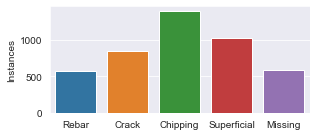

In [55]:
names = ["Rebar", "Crack", "Chipping", "Superficial", "Missing"]
counts = np.array([573, 847, 1385, 1017, 585])

fig, ax = plt.subplots(1, 1, figsize=(4.5, 2))
ax.set_ylabel("Instances")

sns.barplot(names, counts, ax=ax)

fig.tight_layout()
fig.show()
fig.savefig('label_count_dam.pdf', bbox_inches='tight')


In [54]:
sum(counts)/3098

1.422530664945126